# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [7]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [8]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


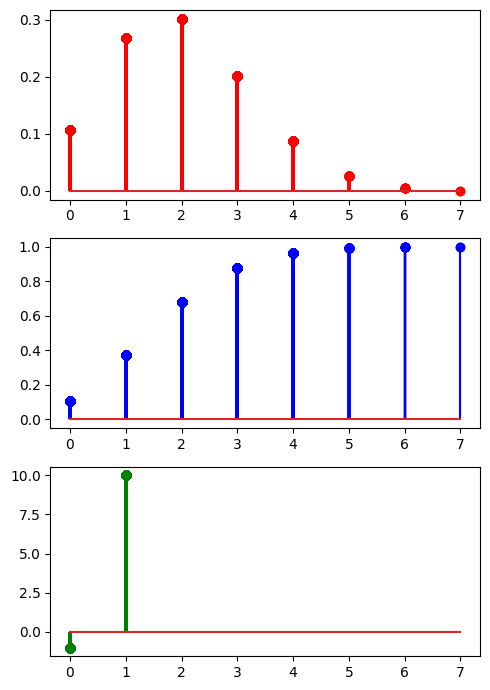

In [9]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

In [10]:
from scipy.stats import norm, uniform
# FUNCIONES DE DISTRIBUCIÓN NORMAL


def dnorm(x, mean=0, sd=1):
    """
    Calcula la densidad de probabilidad de la distribución normal.
    """
    result = norm.pdf(x, loc=mean, scale=sd)
    return result


def pnorm(q, mean=0, sd=1):
    """
    Calcula la probabilidad acumulada de la distribución normal.
    """
    result = norm.cdf(q, loc=mean, scale=sd)
    return result


def qnorm(p, mean=0, sd=1):
    """
    Calcula la función cuantil a partir de la distribución normal.
    """
    result = norm.ppf(p, loc=mean, scale=sd)
    return result


def rnorm(n, mean=0, sd=1):
    """
    Genera variables aleatorias a partir de la distribución normal.
    """
    result = norm.rvs(loc=mean, scale=sd, size=n)
    return result



# FUNCIONES DE DISTRIBUCIÓN UNIFORME


def dunif(x, min=0, max=1):
    """
    Calcula la densidad de probabilidad de la distribución uniforme.
    """
    result = uniform.pdf(x, loc=min, scale=max-min)
    return result


def punif(q, min=0, max=1):
    """
    Calcula la probabilidad acumulada de la distribución uniforme.
    """
    result = uniform.cdf(q, loc=min, scale=max-min)
    return result


def qunif(p, min=0, max=1):
    """
    Calcula la función cuantil a partir de la distribución uniforme.
    """
    result = uniform.ppf(p, loc=min, scale=max-min)
    return result


def runif(n, min=0, max=1):
    """
    Genera variables aleatorias a partir de la distribución uniforme.
    """
    result = uniform.rvs(loc=min, scale=max-min, size=n)
    return result

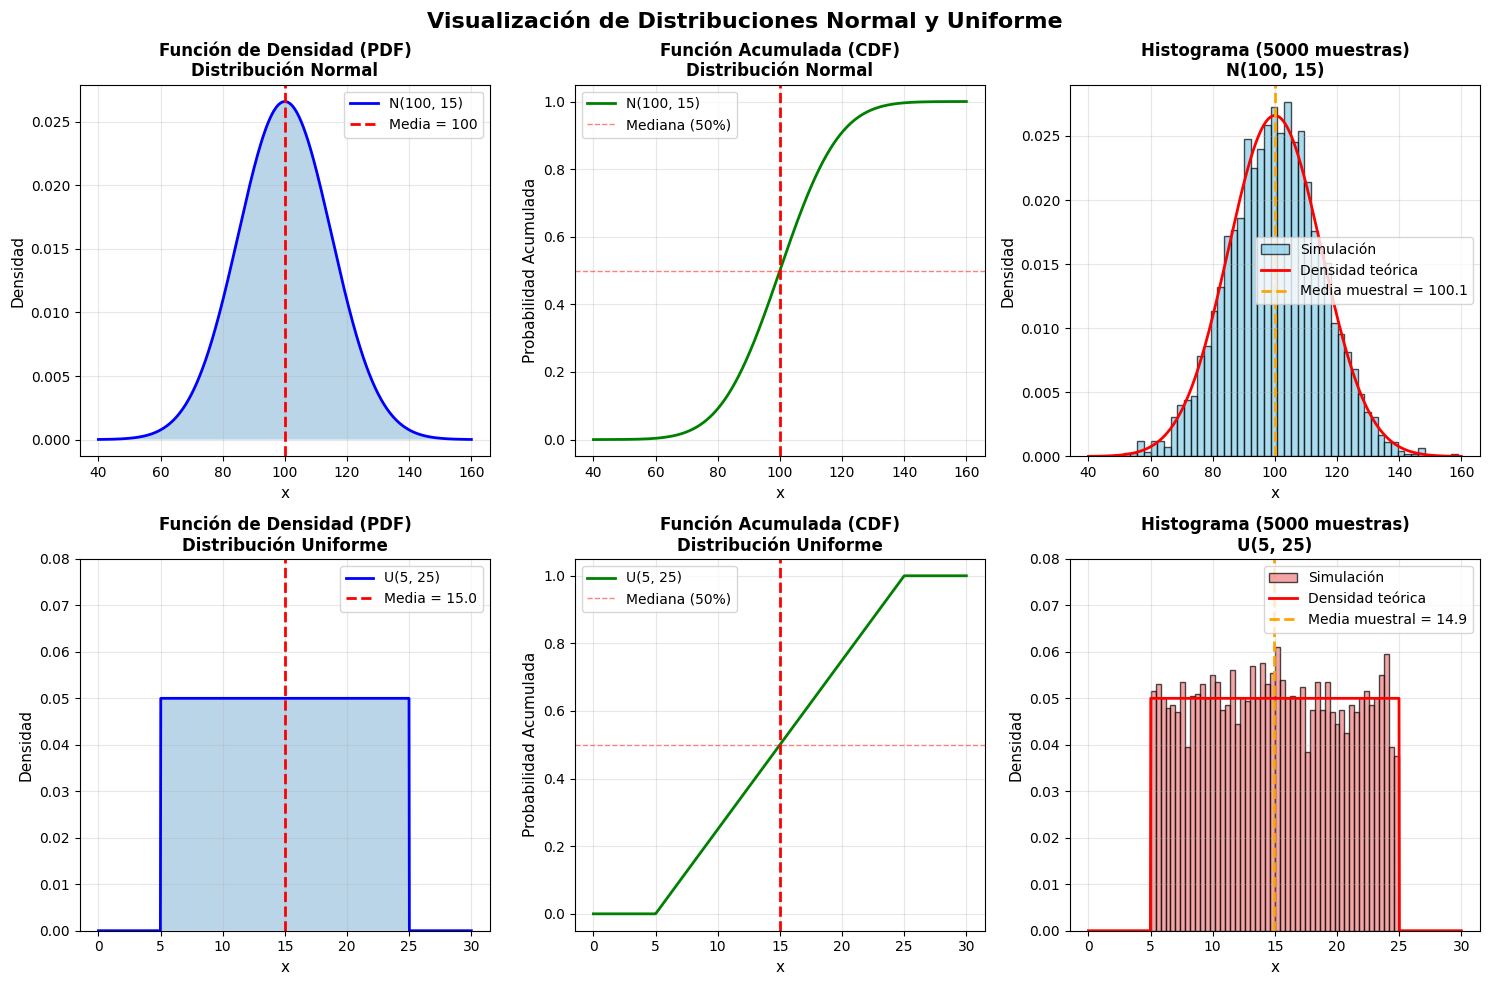

In [11]:

np.random.seed(42)

# Crear figura con subgráficas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Visualización de Distribuciones Normal y Uniforme', fontsize=16, fontweight='bold')


# GRÁFICAS DE DISTRIBUCIÓN NORMAL N(100, 15)


mean_val = 100
sd_val = 15

# 1. Densidad de probabilidad (PDF)
x_norm = np.linspace(mean_val - 4*sd_val, mean_val + 4*sd_val, 1000)
y_norm = dnorm(x_norm, mean=mean_val, sd=sd_val)

axes[0, 0].plot(x_norm, y_norm, 'b-', linewidth=2, label=f'N({mean_val}, {sd_val})')
axes[0, 0].fill_between(x_norm, y_norm, alpha=0.3)
axes[0, 0].axvline(mean_val, color='r', linestyle='--', linewidth=2, label=f'Media = {mean_val}')
axes[0, 0].set_xlabel('x', fontsize=11)
axes[0, 0].set_ylabel('Densidad', fontsize=11)
axes[0, 0].set_title('Función de Densidad (PDF)\nDistribución Normal', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Probabilidad acumulada (CDF)
y_pnorm = pnorm(x_norm, mean=mean_val, sd=sd_val)

axes[0, 1].plot(x_norm, y_pnorm, 'g-', linewidth=2, label=f'N({mean_val}, {sd_val})')
axes[0, 1].axhline(0.5, color='r', linestyle='--', linewidth=1, alpha=0.5, label='Mediana (50%)')
axes[0, 1].axvline(mean_val, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('x', fontsize=11)
axes[0, 1].set_ylabel('Probabilidad Acumulada', fontsize=11)
axes[0, 1].set_title('Función Acumulada (CDF)\nDistribución Normal', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de valores aleatorios
samples_norm = rnorm(5000, mean=mean_val, sd=sd_val)

axes[0, 2].hist(samples_norm, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Simulación')
axes[0, 2].plot(x_norm, y_norm, 'r-', linewidth=2, label='Densidad teórica')
axes[0, 2].axvline(np.mean(samples_norm), color='orange', linestyle='--', linewidth=2, label=f'Media muestral = {np.mean(samples_norm):.1f}')
axes[0, 2].set_xlabel('x', fontsize=11)
axes[0, 2].set_ylabel('Densidad', fontsize=11)
axes[0, 2].set_title(f'Histograma (5000 muestras)\nN({mean_val}, {sd_val})', fontsize=12, fontweight='bold')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)


# GRÁFICAS DE DISTRIBUCIÓN UNIFORME U(5, 25)


min_val = 5
max_val = 25

# 1. Densidad de probabilidad (PDF)
x_unif = np.linspace(min_val - 5, max_val + 5, 1000)
y_unif = dunif(x_unif, min=min_val, max=max_val)

axes[1, 0].plot(x_unif, y_unif, 'b-', linewidth=2, label=f'U({min_val}, {max_val})')
axes[1, 0].fill_between(x_unif, y_unif, alpha=0.3)
axes[1, 0].axvline((min_val + max_val) / 2, color='r', linestyle='--', linewidth=2, label=f'Media = {(min_val + max_val) / 2}')
axes[1, 0].set_xlabel('x', fontsize=11)
axes[1, 0].set_ylabel('Densidad', fontsize=11)
axes[1, 0].set_title('Función de Densidad (PDF)\nDistribución Uniforme', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_ylim(0, 0.08)

# 2. Probabilidad acumulada (CDF)
y_punif = punif(x_unif, min=min_val, max=max_val)

axes[1, 1].plot(x_unif, y_punif, 'g-', linewidth=2, label=f'U({min_val}, {max_val})')
axes[1, 1].axhline(0.5, color='r', linestyle='--', linewidth=1, alpha=0.5, label='Mediana (50%)')
axes[1, 1].axvline((min_val + max_val) / 2, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('x', fontsize=11)
axes[1, 1].set_ylabel('Probabilidad Acumulada', fontsize=11)
axes[1, 1].set_title('Función Acumulada (CDF)\nDistribución Uniforme', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 3. Histograma de valores aleatorios
samples_unif = runif(5000, min=min_val, max=max_val)

axes[1, 2].hist(samples_unif, bins=50, density=True, alpha=0.7, color='lightcoral', edgecolor='black', label='Simulación')
axes[1, 2].plot(x_unif, y_unif, 'r-', linewidth=2, label='Densidad teórica')
axes[1, 2].axvline(np.mean(samples_unif), color='orange', linestyle='--', linewidth=2, label=f'Media muestral = {np.mean(samples_unif):.1f}')
axes[1, 2].set_xlabel('x', fontsize=11)
axes[1, 2].set_ylabel('Densidad', fontsize=11)
axes[1, 2].set_title(f'Histograma (5000 muestras)\nU({min_val}, {max_val})', fontsize=12, fontweight='bold')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)
axes[1, 2].set_ylim(0, 0.08)

plt.tight_layout()
plt.show()
